In [4]:
# Question 1

import alg_cluster
import random

def gen_random_clusters(num_clusters):
    cluster_list = [alg_cluster.Cluster(set(), random.uniform(-1,1), random.uniform(-1,1), 0, 0) for _ in range(num_clusters)]
    return cluster_list

num_clusters = 2
cluster_list = gen_random_clusters(num_clusters)
# print(cluster_list)

In [5]:
import alg_project3_solution
import time

cluster_sizes = range(2,201)
slow_run_times = [0.0 for _ in range(len(cluster_sizes))]
fast_run_times = [0.0 for _ in range(len(cluster_sizes))]

for idx, n in enumerate(cluster_sizes):
    cluster_list = gen_random_clusters(n)
    
    # Time slow_closest_pair
    start = time.time()
    (d_s, i_s, j_s) = alg_project3_solution.slow_closest_pair(cluster_list)
    end = time.time()
    run_time = end - start
    slow_run_times[idx] = run_time
    
    # Time fast_closest_pair
    start = time.time()
    (d_f, i_f, j_f) = alg_project3_solution.fast_closest_pair(cluster_list)
    end = time.time()
    run_time = end - start
    fast_run_times[idx] = run_time

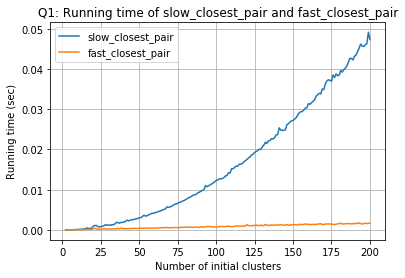

In [7]:
# Plot the cluster size vs run time for slow and fast algorithms
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('Number of initial clusters')
plt.ylabel('Running time (sec)')
plt.title('Q1: Running time of slow_closest_pair and fast_closest_pair')
plt.plot(cluster_sizes, slow_run_times, '-', label='slow_closest_pair')
plt.plot(cluster_sizes, fast_run_times, '-', label='fast_closest_pair')
plt.legend()
plt.grid()
plt.savefig('closest_pair_run_time_q1_proj3_at2.png')
plt.show()


In [ ]:
# Question 2, 3

# see saved plots
# kmeans_clustering run time was 0.2158 sec, much faster than hierarchical_clustering


### Question 4
The worst-case running time of hierarchical clustering is $O(n^2+h(n)n)$, where $h(n)$ is the running time of fast_closest_pair, which is $O(n\log n)$. Hence, the worst-case running time of hierarchical clustering is $O(n^2+(n\log n)n)=O(n^2 \log n)$.

The worst-case running time of k-means clustering is $O(qkn)$ where $q$ is the number of iterations, $k$ is the number of output clusters, and $n$ is the number of input clusters. If we assume that k-means clustering uses a small fixed number of iterations and the number of output clusters is a small fraction of the number of input clusters, then we can approximate $O(qkn)$ as $O(n)$. Thus, k-means clustering is faster than hierarchical clustering under these assumptions.

In [8]:
# Question 5, 6

# See saved plots

In [9]:
# Question 7

# hierarchical clustering: distortion = 175163886915.8305 = 1.7516e11
# k-means clustering: distortion = 271254226924.20047 = 2.7125e11


### Question 8

If we focus on the west coast of the USA, the k-means clustering method produced one particular cluster containing all counties in Northern California/Oregon/Washington that has much higher cluster error than that of the two clusters in Southern California. The k-means cluster that combines Northern California counties with Oregon/Washington counties contributes significantly to the higher distortion of the overall clustering because these two regions are far apart geographically and their centroid is somewhere in between.

In contrast, the hierarchical clustering method produced clusters with one separate cluster for Oregon/Washington counties, one for Northern California counties, and one for Southern California counties. It is visually apparent that the hierarchical clustering method produced clusters on the USA west coast that have smaller cluster error compared to that of the k-means clustering method.

One possible reason that k-means produced clustering with higher distortion (especially on the west coast) is due to how k-means clustering generates its initial clustering. In our implementation, we selected the initial centroids as the counties with the largest population. However, because none of the Washington/Oregon counties rank in the top 9 in population, there was no initial centroid placed in the Washington/Oregon area. This caused the Washington/Oregon counties to be combined with the next closest cluster in Northern California, even though it may seem more appropriate for them to be in separate clusters due to their long distance apart.

Another noteworthy difference between the two methods is that k-means clustering produced two separate clusters in the Southern California region (Los Angeles counties and San Diego counties), whereas hierarchical clustering produced just one cluster containing all of the Southern California counties. If we are looking at a big picture of the USA, it may make more sense to lump all Southern California counties into one cluster because the Los Angeles and San Diego metro areas are located relatively close to one another.


### Question 9

Based on my answer to Question 8, I would say the hierarchical clustering method requires less human supervision to produce clusterings with relatively low distortion. The clustering produced by the k-means method is heavily affected by where the initial clusters are generated. Hence, for the k-means method to work effectively, some human insight about the clustering of the data is usually required in choosing the location of initial clusters.

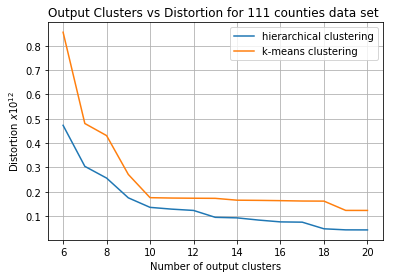

In [37]:
# Question 10
import pickle

with open("hc_distortion_111.pickle", "rb") as f:
    hc_dict_111 = pickle.load(f)
with open("kmeans_distortion_111.pickle", "rb") as f:
    kmeans_dict_111 = pickle.load(f)

for idx in range(len(hc_dict_111['distortion'])):
    hc_dict_111['distortion'][idx] = hc_dict_111['distortion'][idx]/1.0e12
    kmeans_dict_111['distortion'][idx] = kmeans_dict_111['distortion'][idx]/1.0e12

plt.xlabel('Number of output clusters')
plt.ylabel('Distortion $x 10^{12}$')
plt.title('Output Clusters vs Distortion for 111 counties data set ')
plt.plot(hc_dict_111['output_clusters'], hc_dict_111['distortion'], '-', label='hierarchical clustering')
plt.plot(kmeans_dict_111['output_clusters'], kmeans_dict_111['distortion'], '-', label='k-means clustering')
plt.legend()
plt.grid()
plt.savefig('distortion111_q10_proj3_at2.png')
plt.show()

For the 111 counties data set, the hierarchical clustering method consistently produces lower distortion clusterings than that of k-means clustering when the number of output clusters is in the range 6 to 20.

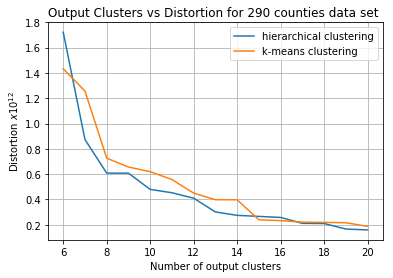

In [38]:
with open("hc_distortion_290.pickle", "rb") as f:
    hc_dict_290 = pickle.load(f)
with open("kmeans_distortion_290.pickle", "rb") as f:
    kmeans_dict_290 = pickle.load(f)

for idx in range(len(kmeans_dict_290['distortion'])):
    hc_dict_290['distortion'][idx] = hc_dict_290['distortion'][idx]/1.0e12
    kmeans_dict_290['distortion'][idx] = kmeans_dict_290['distortion'][idx]/1.0e12

plt.xlabel('Number of output clusters')
plt.ylabel('Distortion $x 10^{12}$')
plt.title('Output Clusters vs Distortion for 290 counties data set ')
plt.plot(hc_dict_290['output_clusters'], hc_dict_290['distortion'], '-', label='hierarchical clustering')
plt.plot(kmeans_dict_290['output_clusters'], kmeans_dict_290['distortion'], '-', label='k-means clustering')
plt.legend()
plt.grid()
plt.savefig('distortion290_q10_proj3_at2.png')
plt.show()

In [ ]:
For the 290 counties data set, neither clustering method consistently produces lower distortion 
clusterings when the number of output clusters is in the range 6 to 20. With 6 output clusters, the k-means
clustering method has lower distortion clusterings. Then from 7 to 14 output clusters, hierarchical clustering produces 
lower distortion clusterings. From 15 to 20 output clusters, neither clustering method consistently produces lower 
distortion clusterings.

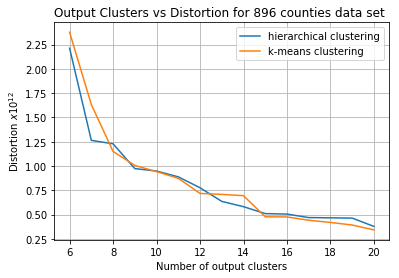

In [40]:
with open("hc_distortion_896.pickle", "rb") as f:
    hc_dict_896 = pickle.load(f)
with open("kmeans_distortion_896.pickle", "rb") as f:
    kmeans_dict_896 = pickle.load(f)

for idx in range(len(hc_dict_896['distortion'])):
    hc_dict_896['distortion'][idx] = hc_dict_896['distortion'][idx]/1.0e12
    kmeans_dict_896['distortion'][idx] = kmeans_dict_896['distortion'][idx]/1.0e12

plt.xlabel('Number of output clusters')
plt.ylabel('Distortion $x 10^{12}$')
plt.title('Output Clusters vs Distortion for 896 counties data set ')
plt.plot(hc_dict_896['output_clusters'], hc_dict_896['distortion'], '-', label='hierarchical clustering')
plt.plot(kmeans_dict_896['output_clusters'], kmeans_dict_896['distortion'], '-', label='k-means clustering')
plt.legend()
plt.grid()
plt.savefig('distortion896_q10_proj3_at2.png')
plt.show()

For the 896 counties data set, neither clustering method consistently produces lower distortion 
clusterings when the number of output clusters is in the range 6 to 20.

### Overall evaluation

The answer to this question depends on the number of counties in the data set and how they are distributed throughout the map. As shown in the output clusters versus distortion plots, the hierarchical clustering method always produces clusterings with either lower or similar distortion to that of the k-means clustering method. A weakness of k-means clustering is that more human supervision is needed to produce relatively low distortion clusterings. The human has to select the appropriate initial cluster locations, which usually requires at least some basic understanding of the data.

As the number of data points increases, the distortion of k-means clustering decreases and approaches that of hierarchical clustering. Thus with a large number of data points, k-means clustering becomes preferable because it runs faster than hierarchical clustering and usually approaches a similar level of distortion.
